Taken from [second part of Speech processing series](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505)

- We already know how sound is represented digitally, and that we need to convert it into a spectrogram for use in deep learning architectures. This part dives into detail how that is done and how we can tune that conversion to get better performance.

#### Audio file formats and Python libraries
- Audio data for deep learning models will usually start out as digital audio files
- Different types of audio formats: .wav, .mp3, .wma, .aac, .flac
- Commonly used libraries: librosa, scipy, torchaudio (pytorch), ...

### Audio signal data
- Audio data is obtained by sampling the sound wave at regular time intervals and measuring the intensity or amplitude of the wave at each sample. The metadata for that audio tells us the sampling rate which is the number of samples per second.
- In memory, audio is represented as a time series of numbers, representing the amplitude at each timestep. For instance, if the sample rate was 16800, a one-second clip of audio would have 16800 numbers. Since the measurements are taken at fixed intervals of time, the data contains only the amplitude numbers and not the time values. Given the sample rate, we can figure out at what time instant each amplitude number measurement was taken.

In [21]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sr = 16800

In [4]:
x, _ = librosa.load('./audio/SA1.WAV', sr = sr)

In [5]:
x.shape

(49137,)

In [7]:
x

array([ 2.9922800e-05, -3.0110501e-05,  5.2204829e-05, ...,
       -5.8838836e-05, -1.9841017e-04,  0.0000000e+00], dtype=float32)

In [12]:
max(x), min(x), np.mean(x)

(0.088254124, -0.06670344, -8.141768e-06)

### Spectrograms
- Deep learning models rarely take this raw audio directly as input. The common practice is to convert the audio into a spectrogram. The spectrogram is a concise 'snapshot' of an audio wave in "image" format.
- Spectrograms are generated from sound signals using Fourier Transforms. A Fourier Transform decomposes the signal into its constituent frequencies and displays the amplitude of each frequency present in the signal.
- A Spectrogram chops up the duration of the sound signal into smaller time segments and then applies the Fourier Transform to each segment, to determine the frequencies contained in that segment. It then combines the Fourier Transforms for all those segments into a single plot.
- It plots Frequency (y-axis) vs Time (x-axis) and uses different colors to indicate the Amplitude of each frequency. The brighter the color, the higher the energy of the signal.

### How do humans hear frequencies?
- The way we hear frequencies in sound is known as 'pitch'. It is a subjective impression of the frequency. So a high-pitched sound has a higher frequency than a low-pitched sound. Humans do not percieve frequencies linearly. 
- 200 Hz vs 100 Hz is percieved differently from 1000 Hz vs 1100 Hz.
- ``We hear sound in a logarithmic scale rather than a linear scale.``

### Mel scale
- Mel scale is a scale of pitches, such that each unit is judged by listeners to be equal in pitch distance from the next.

``Amplitude of a sound is rather logarithmical than linear``

### Mel Spectrograms
- A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.
    * It uses the Mel Scale instead of Frequency on the y-axis
    * It uses the Decibel Scale instead of Amplitude to indicate colors
- For deep learning models, we usually use this rather than a simple Spectrogram.

/home/thanhpv21/.local/lib/python3.7/site-packages/librosa/display.py:823: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


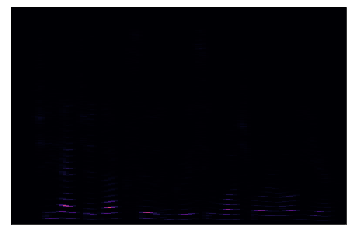

In [19]:
sgram = librosa.stft(x)
librosa.display.specshow(sgram)

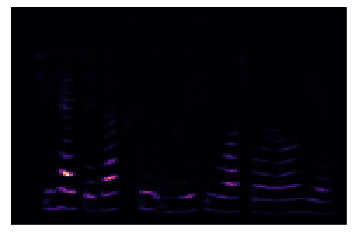

In [20]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S = sgram_mag, sr = sr)
librosa.display.specshow(mel_scale_sgram)

/home/thanhpv21/.local/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/thanhpv21/.local/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


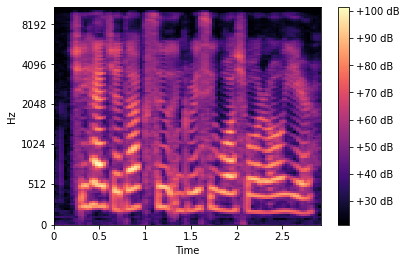

In [23]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref = np.min)
librosa.display.specshow(mel_sgram, sr = sr, x_axis ='time', y_axis ='mel')
plt.colorbar(format = '%+2.0f dB')